# "NLP Techniques for Analyzing Character Relationships in Game of Thrones"

## Importing libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import re
import matplotlib.pyplot as plt
from spacy.tokens import Span

In [2]:
pd.set_option('display.max_colwidth', 1000)

## Importing text from books

In [3]:
directory = r'D:\Documentos\Projetos\GoT-NLP-Project\books\txt'

all_text = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            all_text.append(text)

In [4]:
all_text[0][:3001]

'A GAME OF THRONES\n\n\nA Song of Ice and Fire\n\nBook I\n\n\nGeorge R.R. Martin\n\n\n\n\n\nCONTENT\n\nMap of the North\n\nMap of the South\n\nPrologue\n\nBran\n\nCatelyn\n\nDaenerys\n\nEddard\n\nJon\n\nCatelyn\n\nArya\n\nBran\n\nTyrion\n\nJon\n\nDaenerys\n\nEddard\n\nTyrion\n\nCatelyn\n\nSansa\n\nEddard\n\nBran\n\nCatelyn\n\nJon\n\nEddard\n\nTyrion\n\nArya\n\nDaenerys\n\nBran\n\nEddard\n\nJon\n\nEddard\n\nCatelyn\n\nSansa\n\nEddard\n\nTyrion\n\nArya\n\nEddard\n\nCatelyn\n\nEddard\n\nDaenerys\n\nBran\n\nTyrion\n\nEddard\n\nCatelyn\n\nJon\n\nTyrion\n\nEddard\n\nSansa\n\nEddard\n\nDaenerys\n\nEddard\n\nJon\n\nEddard\n\nArya\n\nSansa\n\nJon\n\nBran\n\nDaenerys\n\nCatelyn\n\nTyrion\n\nSansa\n\nEddard\n\nCatelyn\n\nJon\n\nDaenerys\n\nTyrion\n\nCatelyn\n\nDaenerys\n\nArya\n\nBran\n\nSansa\n\nDaenerys\n\nTyrion\n\nJon\n\nCatelyn\n\nDaenerys\n\nAppendix\n\nHouse Baratheon\n\n\n\nHouse Stark\n\n\n\nHouse Lannister\n\n\n\nHouse Arryn\n\n\n\nHouse Tully\n\n\n\nHouse Tyrell\n\n\n\nHouse Greyjoy\n\

In [5]:
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 10000000

In [6]:
book_one = all_text[0]
# Applying NLP Processing
doc = nlp(book_one)

In [7]:
# Visualize identified entities
displacy.render(doc[0:2000], style="ent", jupyter=True)

## Extracting all the character's name from fandom

### Web Scraping using Selenium

In [8]:
# Launch the browser
driver = webdriver.Chrome()

# Load the webpage
url = "https://awoiaf.westeros.org/index.php/List_of_characters"
driver.get(url)

# Find the character names (sometimes contains titles or location)
characters = driver.find_elements(By.XPATH, "//div[@class='mw-parser-output']/ul/li")

# Extract the first title from each "li" element
character_names = []
for character in characters:
    title = character.find_element(By.XPATH, ".//a[@title]")
    character_names.append(title.get_attribute("title"))

# Print the names
print(character_names[:50])

# Close the browser
driver.quit()

['A certain man', 'Abelar Hightower', 'Abelon', 'Addam of Duskendale', 'Addam Frey', 'Addam Hightower', 'Addam Marbrand', 'Addam Osgrey', 'Addam Rivers', 'Addam Velaryon', 'Addam Whitehead', 'Addison Hill', 'Adham Dannett (page does not exist)', 'Adrack Humble', 'Adrian Redfort', 'Adrian Tarbeck', 'Adrian Thorne', 'Aegon Ambrose', 'Aegon Blackfyre', 'Aegon Frey (son of Stevron)', 'Aegon Frey (son of Aenys)', 'Aegon I Targaryen', 'Aegon II Targaryen', 'Aegon III Targaryen', 'Aegon IV Targaryen', 'Aegon V Targaryen', 'Aegon Targaryen (son of Gaemon)', 'Aegon Targaryen (son of Aenys I)', 'Aegon Targaryen (son of Jaehaerys I)', 'Aegon Targaryen (son of Baelon)', 'Aegon Targaryen (son of Aerys II)', 'Aegon Targaryen (son of Rhaegar)', 'Aegor Rivers', 'Aelinor Penrose', 'Aelor Targaryen', 'Aelora Targaryen', 'Aelyx Targaryen', 'Aemma Arryn', 'Aemon Blackfyre', 'Aemon Costayne', 'Aemon Estermont', 'Aemon Rivers', 'Aemon Steelsong', 'Aemon Targaryen (son of Jaehaerys I)', 'Aemon Targaryen (son

In [9]:
character_df = pd.DataFrame({'character': character_names})
character_df.head(15)

,character
0,A certain man
1,Abelar Hightower
2,Abelon
3,Addam of Duskendale
4,Addam Frey
5,Addam Hightower
6,Addam Marbrand
7,Addam Osgrey
8,Addam Rivers
9,Addam Velaryon


In [10]:
# Remove brackets and text within brackets
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])
character_df.head(15)

,character,character_firstname
0,A certain man,A
1,Abelar Hightower,Abelar
2,Abelon,Abelon
3,Addam of Duskendale,Addam
4,Addam Frey,Addam
5,Addam Hightower,Addam
6,Addam Marbrand,Addam
7,Addam Osgrey,Addam
8,Addam Rivers,Addam
9,Addam Velaryon,Addam


In [11]:
# Drop row that has the first word "House"
character_df = character_df[~character_df['character_firstname'].str.contains("House")]

In [12]:
character_df[character_df['character_firstname'] == "The"]

,character,character_firstname
2783,"The Rat, the Hawk, and the Pig",The
3192,The Sparr,The
3232,The Stonehouse,The


In [13]:
# Remove firstnames that have only one letter (in this case only the first row)
character_df = character_df[character_df['character_firstname'].str.len() != 1].reset_index(drop=True)
character_df.sample(20)

,character,character_firstname
0,Abelar Hightower,Abelar
1,Abelon,Abelon
2,Addam of Duskendale,Addam
3,Addam Frey,Addam
4,Addam Hightower,Addam
...,...,...
3760,Zharaq zo Loraq,Zharaq
3761,Zhea,Zhea
3762,Zhoe Blanetree,Zhoe
3763,Zia Frey,Zia


In [14]:
# Save character's name locally
character_df.to_csv('characters_name.csv', index=False)

In [15]:
# Reading file as name dataframe
character_df = pd.read_csv('characters_name.csv')
character_df.sample(20)

,character,character_firstname
0,Abelar Hightower,Abelar
1,Abelon,Abelon
2,Addam of Duskendale,Addam
3,Addam Frey,Addam
4,Addam Hightower,Addam
...,...,...
3760,Zharaq zo Loraq,Zharaq
3761,Zhea,Zhea
3762,Zhoe Blanetree,Zhoe
3763,Zia Frey,Zia


### Adding scraped characters name to ScraPy recognized entities

In [16]:
# Visualize previously identified entities
displacy.render(doc[0:2000], style="ent", jupyter=True)

In [17]:
# List of possible middle age pronouns to disregard
pronoun_list = ["Majesty", "Lord", "Lady", "Sir", "Ser", "Dame", "Sire", "Baron", "Baroness", "Count", "Countess", "Viscount",
                "Viscountess", "Earl", "Duke", "Duchess", "Prince", "Princess", "The", "King", "Queen"]


In [18]:
# Add character names as entities

patterns = []

for _, row in character_df.iterrows():
    character = row["character"]
    firstname = row["character_firstname"]
    patterns.append({"label": "PERSON", "pattern": character})
    if firstname not in pronoun_list:
        patterns.append({"label": "PERSON", "pattern": firstname})
    
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)

In [19]:
# Apply NLP processing containing the new entities
doc2 = nlp(book_one)

In [20]:
# Visualize new identified entities
displacy.render(doc2[:3000], style="ent", jupyter=True)

### Content Filtering

In [21]:
# Remove text preceding the Prologue
book_one_filtered = re.sub(r'^.*?(?=PROLOGUE)', '', book_one, flags=re.DOTALL)

# Remove text after Table of Content
book_one_filtered = re.sub(r'(?=Table of Contents).*$', '', book_one_filtered, flags=re.DOTALL)

In [22]:
# Apply NLP processing to filtered text
doc3 = nlp(book_one_filtered)

In [23]:
# Visualize new identified entities
displacy.render(doc3[:3000], style="ent", jupyter=True)

## Sentential Character Relationship Analysis

### Look for entities by sentence, filtering by "PERSON" label

In [24]:
sent_entity = []

# Loop through sentences, store named entity list for each sentence
for sent in doc3.sents:
    person_list = [ent.text for ent in sent.ents if ent.label_ == "PERSON"]
    sent_entity.append({"sentence": sent, "character_entities": person_list})
    
sent_entity_df = pd.DataFrame(sent_entity)

In [25]:
sent_entity_df.head(50)

,sentence,character_entities
0,"(PROLOGUE, \n\n)",[]
1,"(“, We, should, start, back, ,, ”, Gared, urged, as, the, woods, began, to, grow, dark, around, them, .)",[Gared]
2,"(“, The, wildlings, are, dead, ., ”, \n\n, “, Do, the, dead, frighten, you, ?, ”)",[]
3,"(Ser, Waymar, Royce, asked, with, just, the, hint, of, a, smile, ., \n\n)",[Waymar Royce]
4,"(Gared, did, not, rise, to, the, bait, .)",[Gared]
5,"(He, was, an, old, man, ,, past, fifty, ,, and, he, had, seen, the, lordlings, come, and, go, .)",[]
6,"(“, Dead, is, dead, ,, ”, he, said, .)",[]
7,"(“, We, have, no, business, with, the, dead, ., ”, \n\n, “, Are, they, dead, ?, ”)",[]
8,"(Royce, asked, softly, .)",[Royce]
9,"(“, What, proof, have, we, ?, ”, \n\n, “, Will, saw, them, ,, ”, Gared, said, .)","[Will, Gared]"


In [26]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [27]:
sent_entity_df['character_entities'] = sent_entity_df['character_entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(50)

,sentence,character_entities
1,"(“, We, should, start, back, ,, ”, Gared, urged, as, the, woods, began, to, grow, dark, around, them, .)",[Gared]
3,"(Ser, Waymar, Royce, asked, with, just, the, hint, of, a, smile, ., \n\n)",[Waymar Royce]
4,"(Gared, did, not, rise, to, the, bait, .)",[Gared]
8,"(Royce, asked, softly, .)",[Royce]
9,"(“, What, proof, have, we, ?, ”, \n\n, “, Will, saw, them, ,, ”, Gared, said, .)","[Will, Gared]"
10,"(“, If, he, says, they, are, dead, ,, that, ’s, proof, enough, for, me, ., ”, \n\n, Will, had, known, they, would, drag, him, into, the, quarrel, sooner, or, later, .)",[Will]
13,"(“, My, wet, nurse, said, the, same, thing, ,, Will, ,, ”, Royce, replied, .)","[Will, Royce]"
17,"(“, We, have, a, long, ride, before, us, ,, ”, Gared, pointed, out, .)",[Gared]
20,"(Ser, Waymar, Royce, glanced, at, the, sky, with, disinterest, .)",[Waymar Royce]
22,"(Are, you, unmanned, by, the, dark, ,, Gared, ?, ”, \n\n, Will, could, see, the, tightness, around, Gared, ’s, mouth, ,, the, barely, suppressed, anger, in, his, eyes, under, the, thick, black, hood, of, his, cloak, .)","[Will, Gared]"


In [28]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\Acer\AppData\Local\Temp\ipykernel_19784\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [29]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,character_entities
1,"(“, We, should, start, back, ,, ”, Gared, urge...",[Gared]
3,"(Ser, Waymar, Royce, asked, with, just, the, h...",[Waymar]
4,"(Gared, did, not, rise, to, the, bait, .)",[Gared]
8,"(Royce, asked, softly, .)",[Royce]
9,"(“, What, proof, have, we, ?, ”, \n\n, “, Will...","[Will, Gared]"
...,...,...
22244,"(], \n\n\n\n, 161, -, 171, Baelor, I, The, Bel...",[Baelor]
22247,"(184, -, 209, Daeron, II, Queen, Naerys, ’, so...","[Daeron, Naerys, Aemon, Dornish, Myriah, Aerys]"
22248,"(I, Second, son, to, Daeron, II, (, left, no, ...","[Maekar, Jaehaerys, Aerys]"
22249,"(The, Mad, King, ,, only, son, to, Jaehaerys, ...","[Jaehaerys, Rhaegar]"


## Create Relationships

In [30]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [31]:
relationship_df = pd.DataFrame(relationships)
relationship_df.tail(20)

,source,target
28130,Jaehaerys,Rhaegar
28131,Rhaegar,Jaime
28132,Daeron,Naerys
28133,Naerys,Aemon
28134,Aemon,Dornish
28135,Dornish,Myriah
28136,Myriah,Aerys
28137,Aerys,Maekar
28138,Maekar,Jaehaerys
28139,Jaehaerys,Aerys


In [32]:
# Sort the cases with a->b and b->a (same relationship)
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.tail(20)

,source,target
28130,Jaehaerys,Rhaegar
28131,Jaime,Rhaegar
28132,Daeron,Naerys
28133,Aemon,Naerys
28134,Aemon,Dornish
28135,Dornish,Myriah
28136,Aerys,Myriah
28137,Aerys,Maekar
28138,Jaehaerys,Maekar
28139,Aerys,Jaehaerys


In [33]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=True, as_index=False).sum()
relationship_df = relationship_df.sort_values(by=["value"], ascending=False)
relationship_df.head(10)

,source,target,value
1421,Ned,Robert,1027
361,Bran,Robb,651
821,Ghost,Jon,546
1107,Joffrey,Sansa,476
141,Arya,Sansa,463
502,Catelyn,Ned,415
511,Catelyn,Robb,314
1149,Jon,Sam,313
1145,Jon,Robb,306
1647,Tyrion,Tywin,299


## Graph analysis and visualization

In [34]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization - Pyvis

In [35]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("got.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## The most important characters in Game of Thrones first book

### Degree centrality

In [36]:
degree_dict = nx.degree_centrality(G)
degree_dict
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])

<AxesSubplot: >

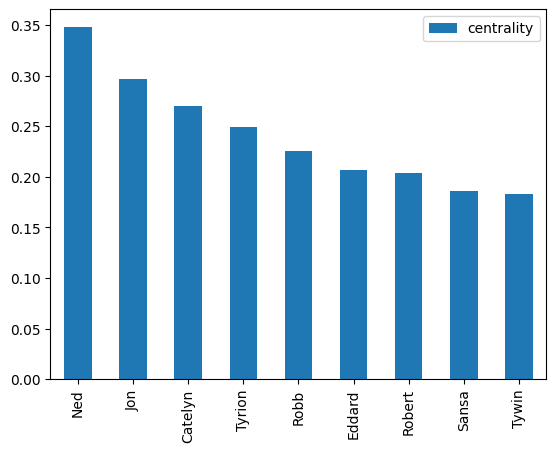

In [37]:
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

### Betweenness centrality

In [38]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])

<AxesSubplot: >

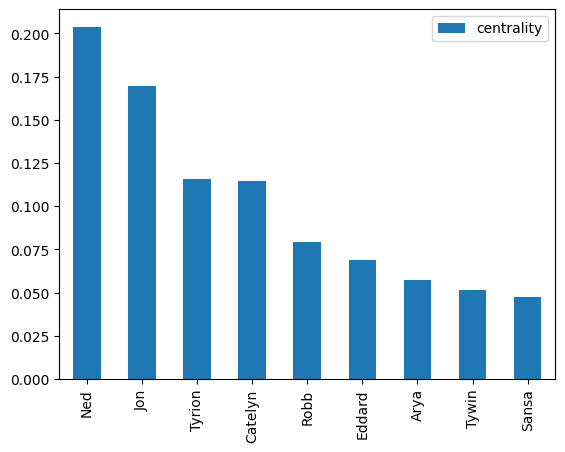

In [39]:
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

### Closeness centrality

In [40]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])

<AxesSubplot: >

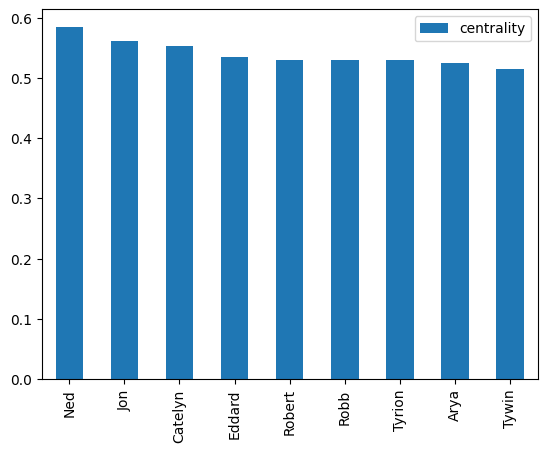

In [41]:
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

### Save centrality measures

In [42]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [43]:
import community as community_louvain

In [44]:
communities = community_louvain.best_partition(G)

In [45]:
nx.set_node_attributes(G, communities, 'group')

In [46]:
com_net = Network(notebook = True, width="75%", height="600px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=['physics'])
com_net.show("got_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
